<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
  * [1.1.Original Data & Standardization](#1.1)
  * [1.2.All features & Standardization](#1.2)  
  * [1.3.Features selected & Standardization](#1.3)   
* [2. Rerun the model on selected Features](#2)  
  * [2.1.Correlation Heatmap](#2.1)
      * [2.1.1 Removing correlated features](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ROCAUC
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.tree import DecisionTreeClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import metrics


# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, GradientBoostingClassifier

<a id='1'></a>
#  <font color=darkgreen>1.Import the Data </font>
<a id='1.1'></a>
###  <font color=green>1.1. Original Data </font>
Let’s load the previous data and results from previous notebook 2

In [3]:
data_train = pd.read_csv("train.csv")

Let's keep the original dataset for later comparisons and make a copy for the FE process

In [4]:
df_original = data_train.copy()

In [5]:
data_train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [6]:
data_test = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)

In [7]:
data_test.shape

(565892, 55)

In [8]:
column_list = data_train.columns
num  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
cat= [column for column in column_list if column not in num]

In [9]:
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

<a id='1.2'></a>
## <font color=green> 1.2.All features & Standardization  <font>
 
Due to excel import, it transforms a new column unnamed

From 55 features, we engineered a total of 165 additional ones

For scaling we need to exclude the dummy variables 

<a id='1.3'></a>
##  <font color=orange>1.3. Selected Model after feature selection & Standardization </font>


Selected features from the feature selection are transferred to cvs and used for further analysis. 

In [10]:
import pandas as pd
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [11]:
X_selected1 = X_selected1[X_selected1.columns.drop(list(X_selected1.filter(regex='Unnamed:')))]
y_selected1 = y_selected1[y_selected1.columns.drop(list(y_selected1.filter(regex='Unnamed:')))]

In [12]:
print(X_selected1.shape)
print(y_selected1.shape)

if X_selected1.shape[0] != y_selected1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 21)
(15120, 1)


We need to filter out the dummy variables for the normalization 

In [13]:
column_list = X_selected1.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [14]:
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Splitting the data into train and validation test 

In [15]:
column_list = X_selected1.columns

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_selected1, y_selected1, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(3024, 21) and (3024, 1) 
The shape of training data:(12096, 21) and (12096, 1) 


## <font color=red> Delete Trial after testing  <font>

In [16]:
X_train_new[scale_numerical] = scaler.fit_transform(X_train_new[scale_numerical])
X_val_new[scale_numerical] = scaler.fit_transform(X_val_new[scale_numerical])

In [17]:
y_train_new = y_train_new.values.ravel()
y_val_new = y_val_new.values.ravel()

In [18]:
X_train_new.head()

,Wilderness_Area4,Subalpine_Climate,binned_elevation,Wilderness_Area3,Wilderness_Area1,Montane_Climate,Lower_Montane_Climate,Elevation_x_Horizontal_Distance_To_Roadways,Elevation_x_Hillshade_Noon,Alpine_Climate,Type_Rubbly,Sqr_Horizontal_Distance_To_Roadways,Road-Hydro,Road-Fire,Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways^2,Elevation_x_Horizontal_Distance_To_Hydrology,Elevation_x_Hillshade_9am,Ele-hydro,Ele+road,Ele+hydro
14128,0,0,0.417240,1,0,1,0,0.142972,0.528666,0,1,0.351539,0.042565,0.212880,-0.355958,-0.140185,0.658113,1.004978,0.111500,0.250449,0.633135
4425,0,1,0.297695,1,0,0,0,-0.058976,0.629495,0,0,0.152898,0.064245,-0.771282,-0.183207,-0.272236,-0.590804,-0.192954,0.667097,0.043864,-0.032767
909,0,1,0.417240,0,1,0,0,2.249098,0.794554,0,0,2.135379,2.603135,2.715176,1.160432,2.994824,-0.039622,0.087140,0.492332,2.205827,0.310386
5123,0,0,0.178151,1,0,1,0,0.304061,0.476117,0,1,0.585066,0.493975,0.193889,-0.136072,0.054393,-0.471462,0.782187,0.479290,0.382763,-0.055025
10901,0,0,-0.419572,1,0,1,0,0.019453,-0.343713,0,1,0.408937,0.370863,0.649665,-0.473838,-0.096535,-0.858030,-0.863736,0.014988,0.060091,-0.719072


In [19]:
#test a different dataframe
X_trial = pd.read_csv("X_trial.csv")
y_trial = pd.read_csv("y_trial.csv")

In [20]:
column_list = X_trial.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [21]:
X_trial = X_trial[X_trial.columns.drop(list(X_trial.filter(regex='Unnamed:')))]
y_trial = y_trial[y_trial.columns.drop(list(y_trial.filter(regex='Unnamed:')))]

In [22]:

X_train_newt, X_val_newt, y_train_newt, y_val_newt = train_test_split(X_trial, y_trial, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_trial.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(15120, 16) and (3024,) 
The shape of training data:(12096, 21) and (12096,) 


Running the correlation matrix, many of these features are correlated. I create another dataframe for only relevant features

I create a subsplit with a dataframe containing only these features instead, based on the split made above

<a id='2'></a>
# <font color=darkgreen> 2.Re-run models with the new selected features  <font>
Some classes such as SDG classifier , Random Forest classifier and naive Bayes classifier can handle mutliple classes naively. Others like logistic regression or Support Vector Machine classifier are stricly binary classifier. However there are various strategies to perform multiclass classification with multiple binary classifiers. 

In [23]:
# Create a dataFrame to compare performance of Classifier Models in the End
classifiers_compare = pd.DataFrame(columns =['Algorithm','Mean CV Score'])

<a id='2.1'></a>
## <font color=green> 2.Correlation Heatmap  <font>
Checking Correlation among features

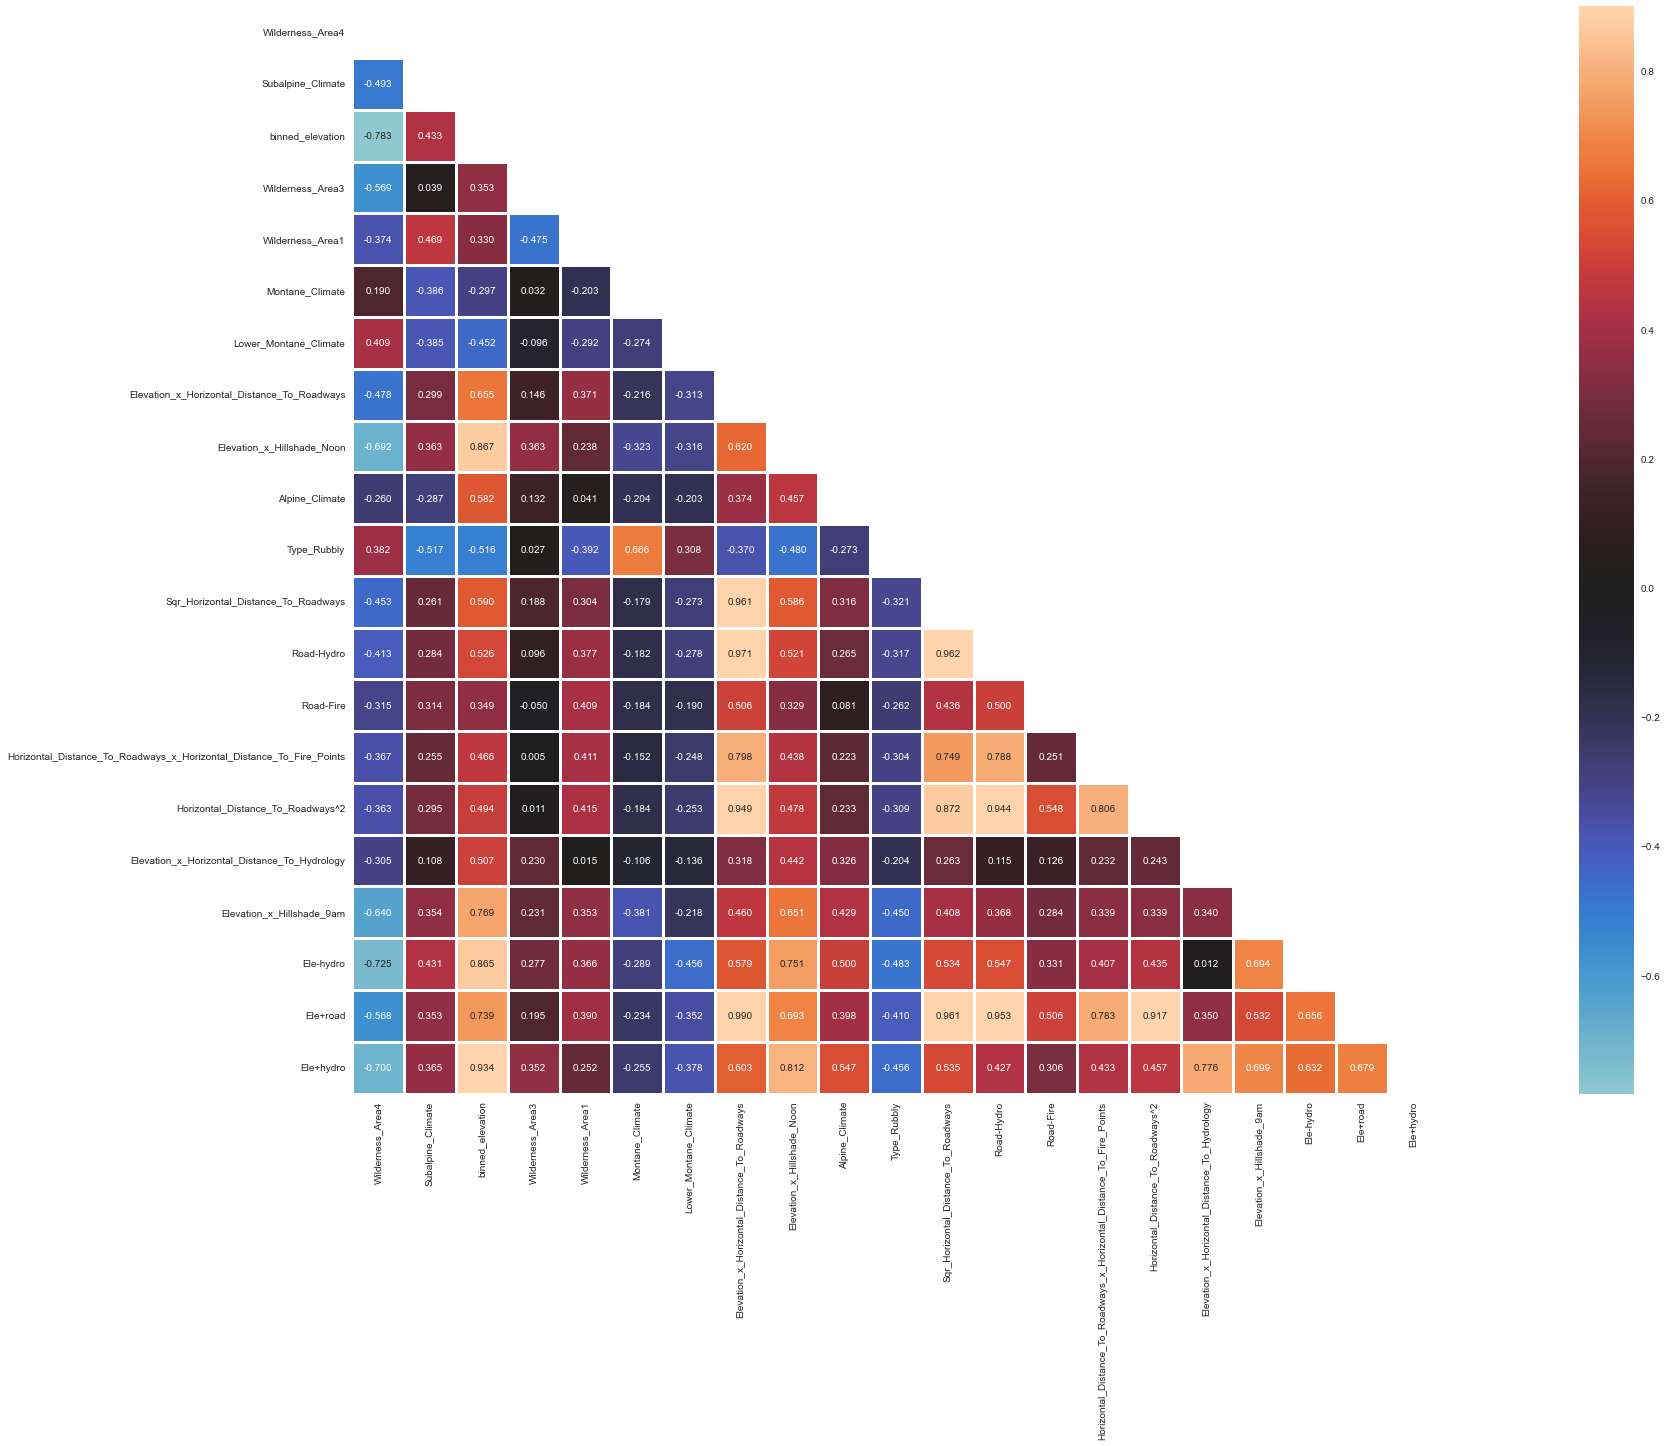

In [24]:
#Heatmap - Checking for autocorrelation among variables 
matrix = X_selected1.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

<a id='2.1.1'></a>
## <font color=green> 2.Removing autocorrelation <font>

Some of these features are heavily correlated one another, before running the models like Logistic Regression, where mutlicorrelaty is an issue, we should ensure, only relevant features are considered, taking a threshold of 0.7 these are:

- Wilderness Area 1 
- Subalpine Climate (synthetic)
- Wilderness Area 3
- Elevation
- Family Moran (synthetic)
- Soil Type 3
- Soil Type 12
- Rock outcrop complex (synthetic)
- Lower Montane Climate (synthetic)
- Family Catamount (synthetic)

TOTAL: 11 features

In [25]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

Remocing Collinearity Features for logistic Regression. 

In [26]:
df_logist = remove_collinear_features(X_selected1, 0.6)

Removed Columns {'Ele-hydro', 'Sqr_Horizontal_Distance_To_Roadways', 'Ele+road', 'Road-Hydro', 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points', 'Elevation_x_Hillshade_9am', 'Horizontal_Distance_To_Roadways^2', 'Type_Rubbly', 'binned_elevation', 'Elevation_x_Horizontal_Distance_To_Roadways', 'Elevation_x_Hillshade_Noon', 'Ele+hydro'}


In [27]:
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(df_logist, y_selected1, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(3024, 21) and (3024,) 
The shape of training data:(12096, 21) and (12096,) 


Done with correlation, time to fit the model

In [28]:
def plot_ROC_curve(model, X_train,y_train, X_val, y_val):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={1: 'Spruce/Fir', 
                                        2: 'Lodgepole Pine', 
                                        3: 'Ponderosa Pine',
                                       4: 'Cottonwood/Willow',
                                       5: 'Aspen',
                                       6: 'Douglas-fir',
                                       7: 'Krummholz'})

                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train,y_train)
    visualizer.score(X_val, y_val)
    visualizer.show()
    
    return visualizer

## <font color=green> 7.1. Decision Trees  <font>

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import xgboost
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from dtreeviz.trees import *
from sklearn.model_selection import GridSearchCV


In [30]:
def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names, filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


### <font color=green> 7.1.1. Single Tree <font>

### 7.1.1.1 No hyperparameters

In [31]:
single_tree = DecisionTreeClassifier(random_state=18)
model_tree = single_tree.fit(X_train_new, y_train_new)
print("MSE = {0:.4f}".format(-np.mean(cross_val_score(single_tree, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 1.8235


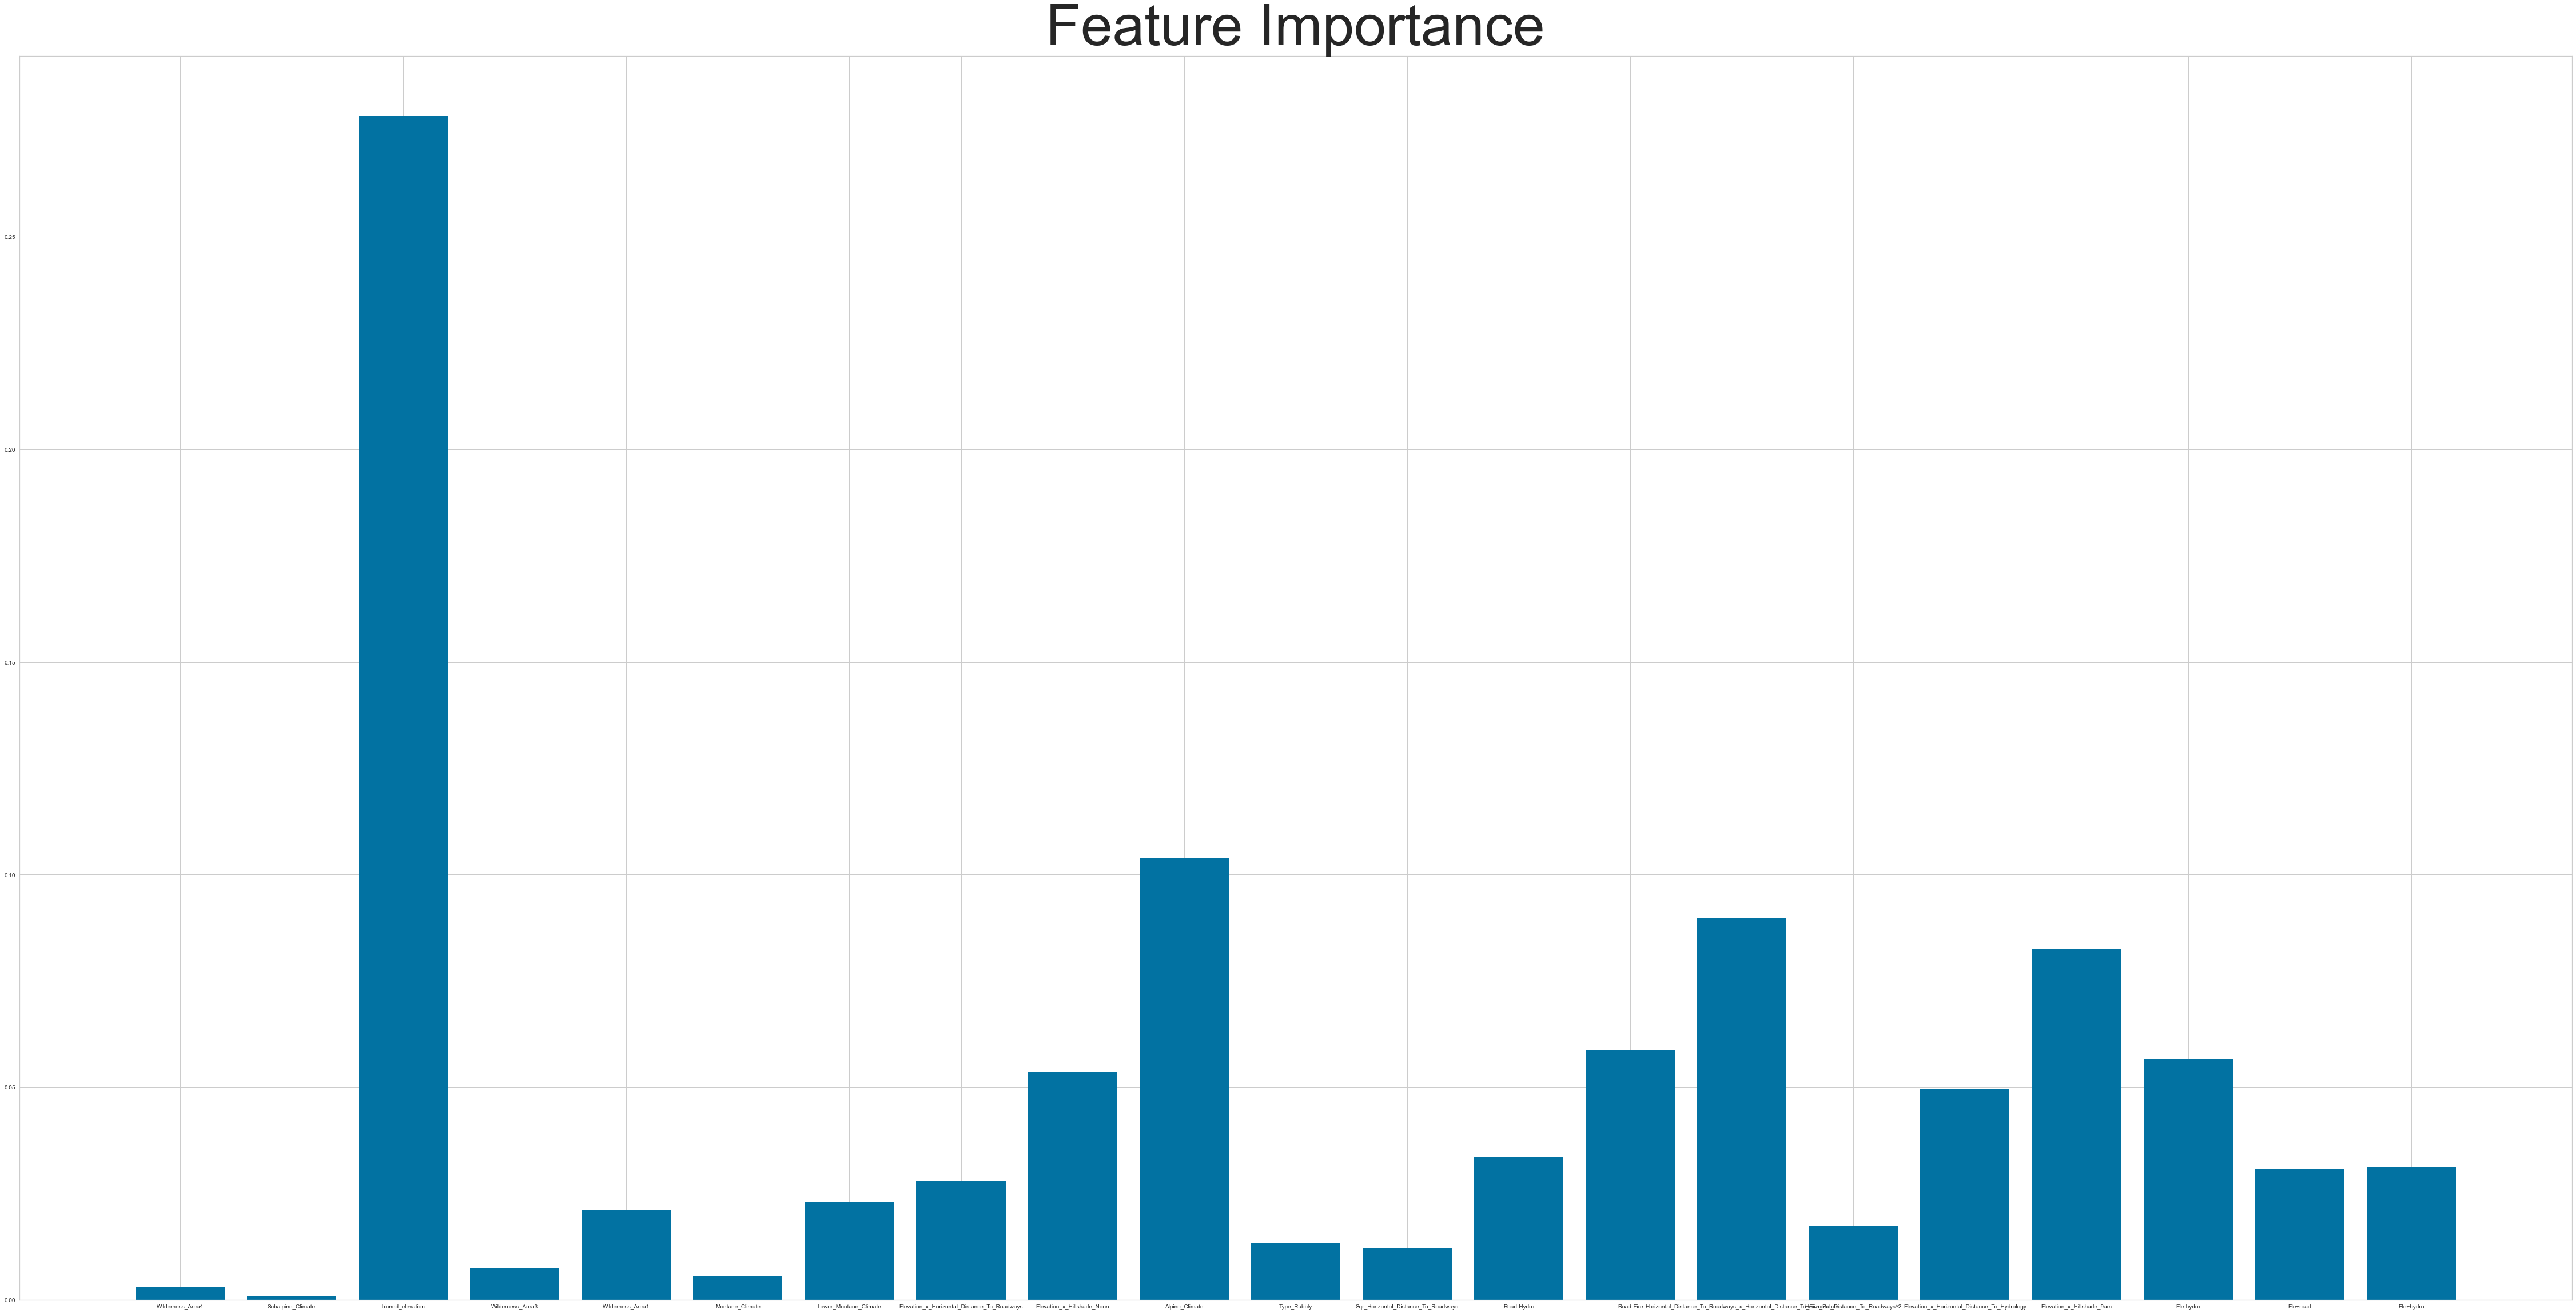

In [32]:
plt.figure(figsize=(80,40))
plt.bar(X_train_new.columns, single_tree.feature_importances_)
plt.title('Feature Importance', fontsize=100);

In [33]:
### 7.1.1.2 Hyperparameters A. Pruning the tree

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,30)}

single_tree_a = GridSearchCV(single_tree,
                            param_grid,
                            scoring='neg_mean_squared_error',
                            cv=5, n_jobs=-1, verbose=1)

single_tree_a.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=18), n_jobs=-1,
             param_grid={'max_depth': range(1, 30)},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
print("Best parameters set found on development set:")
print()
print(single_tree_a.best_params_)
print()
print("Grid scores on development set:")
print()
means = single_tree_a.cv_results_['mean_test_score']
stds = single_tree_a.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, single_tree_a.cv_results_['params']):
    print("MSE = %0.3f (+/-%0.03f) for %r" % (-mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 15}

Grid scores on development set:

MSE = 9.614 (+/-0.095) for {'max_depth': 1}
MSE = 5.152 (+/-0.290) for {'max_depth': 2}
MSE = 3.482 (+/-0.258) for {'max_depth': 3}
MSE = 2.952 (+/-0.162) for {'max_depth': 4}
MSE = 2.834 (+/-0.161) for {'max_depth': 5}
MSE = 2.656 (+/-0.209) for {'max_depth': 6}
MSE = 2.407 (+/-0.223) for {'max_depth': 7}
MSE = 2.272 (+/-0.316) for {'max_depth': 8}
MSE = 2.111 (+/-0.165) for {'max_depth': 9}
MSE = 1.986 (+/-0.164) for {'max_depth': 10}
MSE = 1.896 (+/-0.154) for {'max_depth': 11}
MSE = 1.863 (+/-0.181) for {'max_depth': 12}
MSE = 1.841 (+/-0.201) for {'max_depth': 13}
MSE = 1.840 (+/-0.110) for {'max_depth': 14}
MSE = 1.809 (+/-0.155) for {'max_depth': 15}
MSE = 1.815 (+/-0.124) for {'max_depth': 16}
MSE = 1.867 (+/-0.132) for {'max_depth': 17}
MSE = 1.823 (+/-0.230) for {'max_depth': 18}
MSE = 1.831 (+/-0.160) for {'max_depth': 19}
MSE = 1.856 (+/-0.160) for {'max_depth': 20}
MSE = 1.82

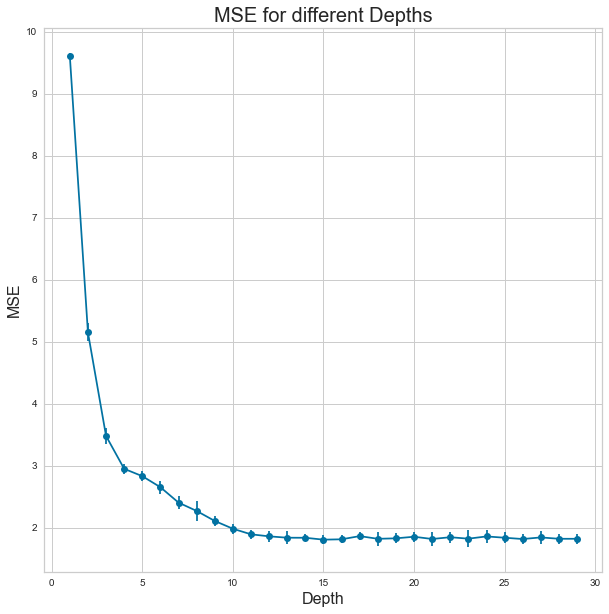

In [36]:
plt.figure(figsize=(10,10))
plt.errorbar(range(1,30,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('MSE for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("MSE", fontsize=16);

In [37]:
single_tree_d16 = DecisionTreeClassifier(random_state=18, max_depth=16)

print("MSE = {0:.4f}".format(-np.mean(cross_val_score(single_tree_d16, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 1.8151


In [38]:
### 7.1.1.3 Bagging

In [39]:
from sklearn.ensemble import RandomForestRegressor

tree_bagging = RandomForestRegressor(random_state=42, n_jobs=-1, max_features=len(X_train_new.columns))
print("MSE = {0:.4f}".format(-np.mean(cross_val_score(tree_bagging, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 1.0059


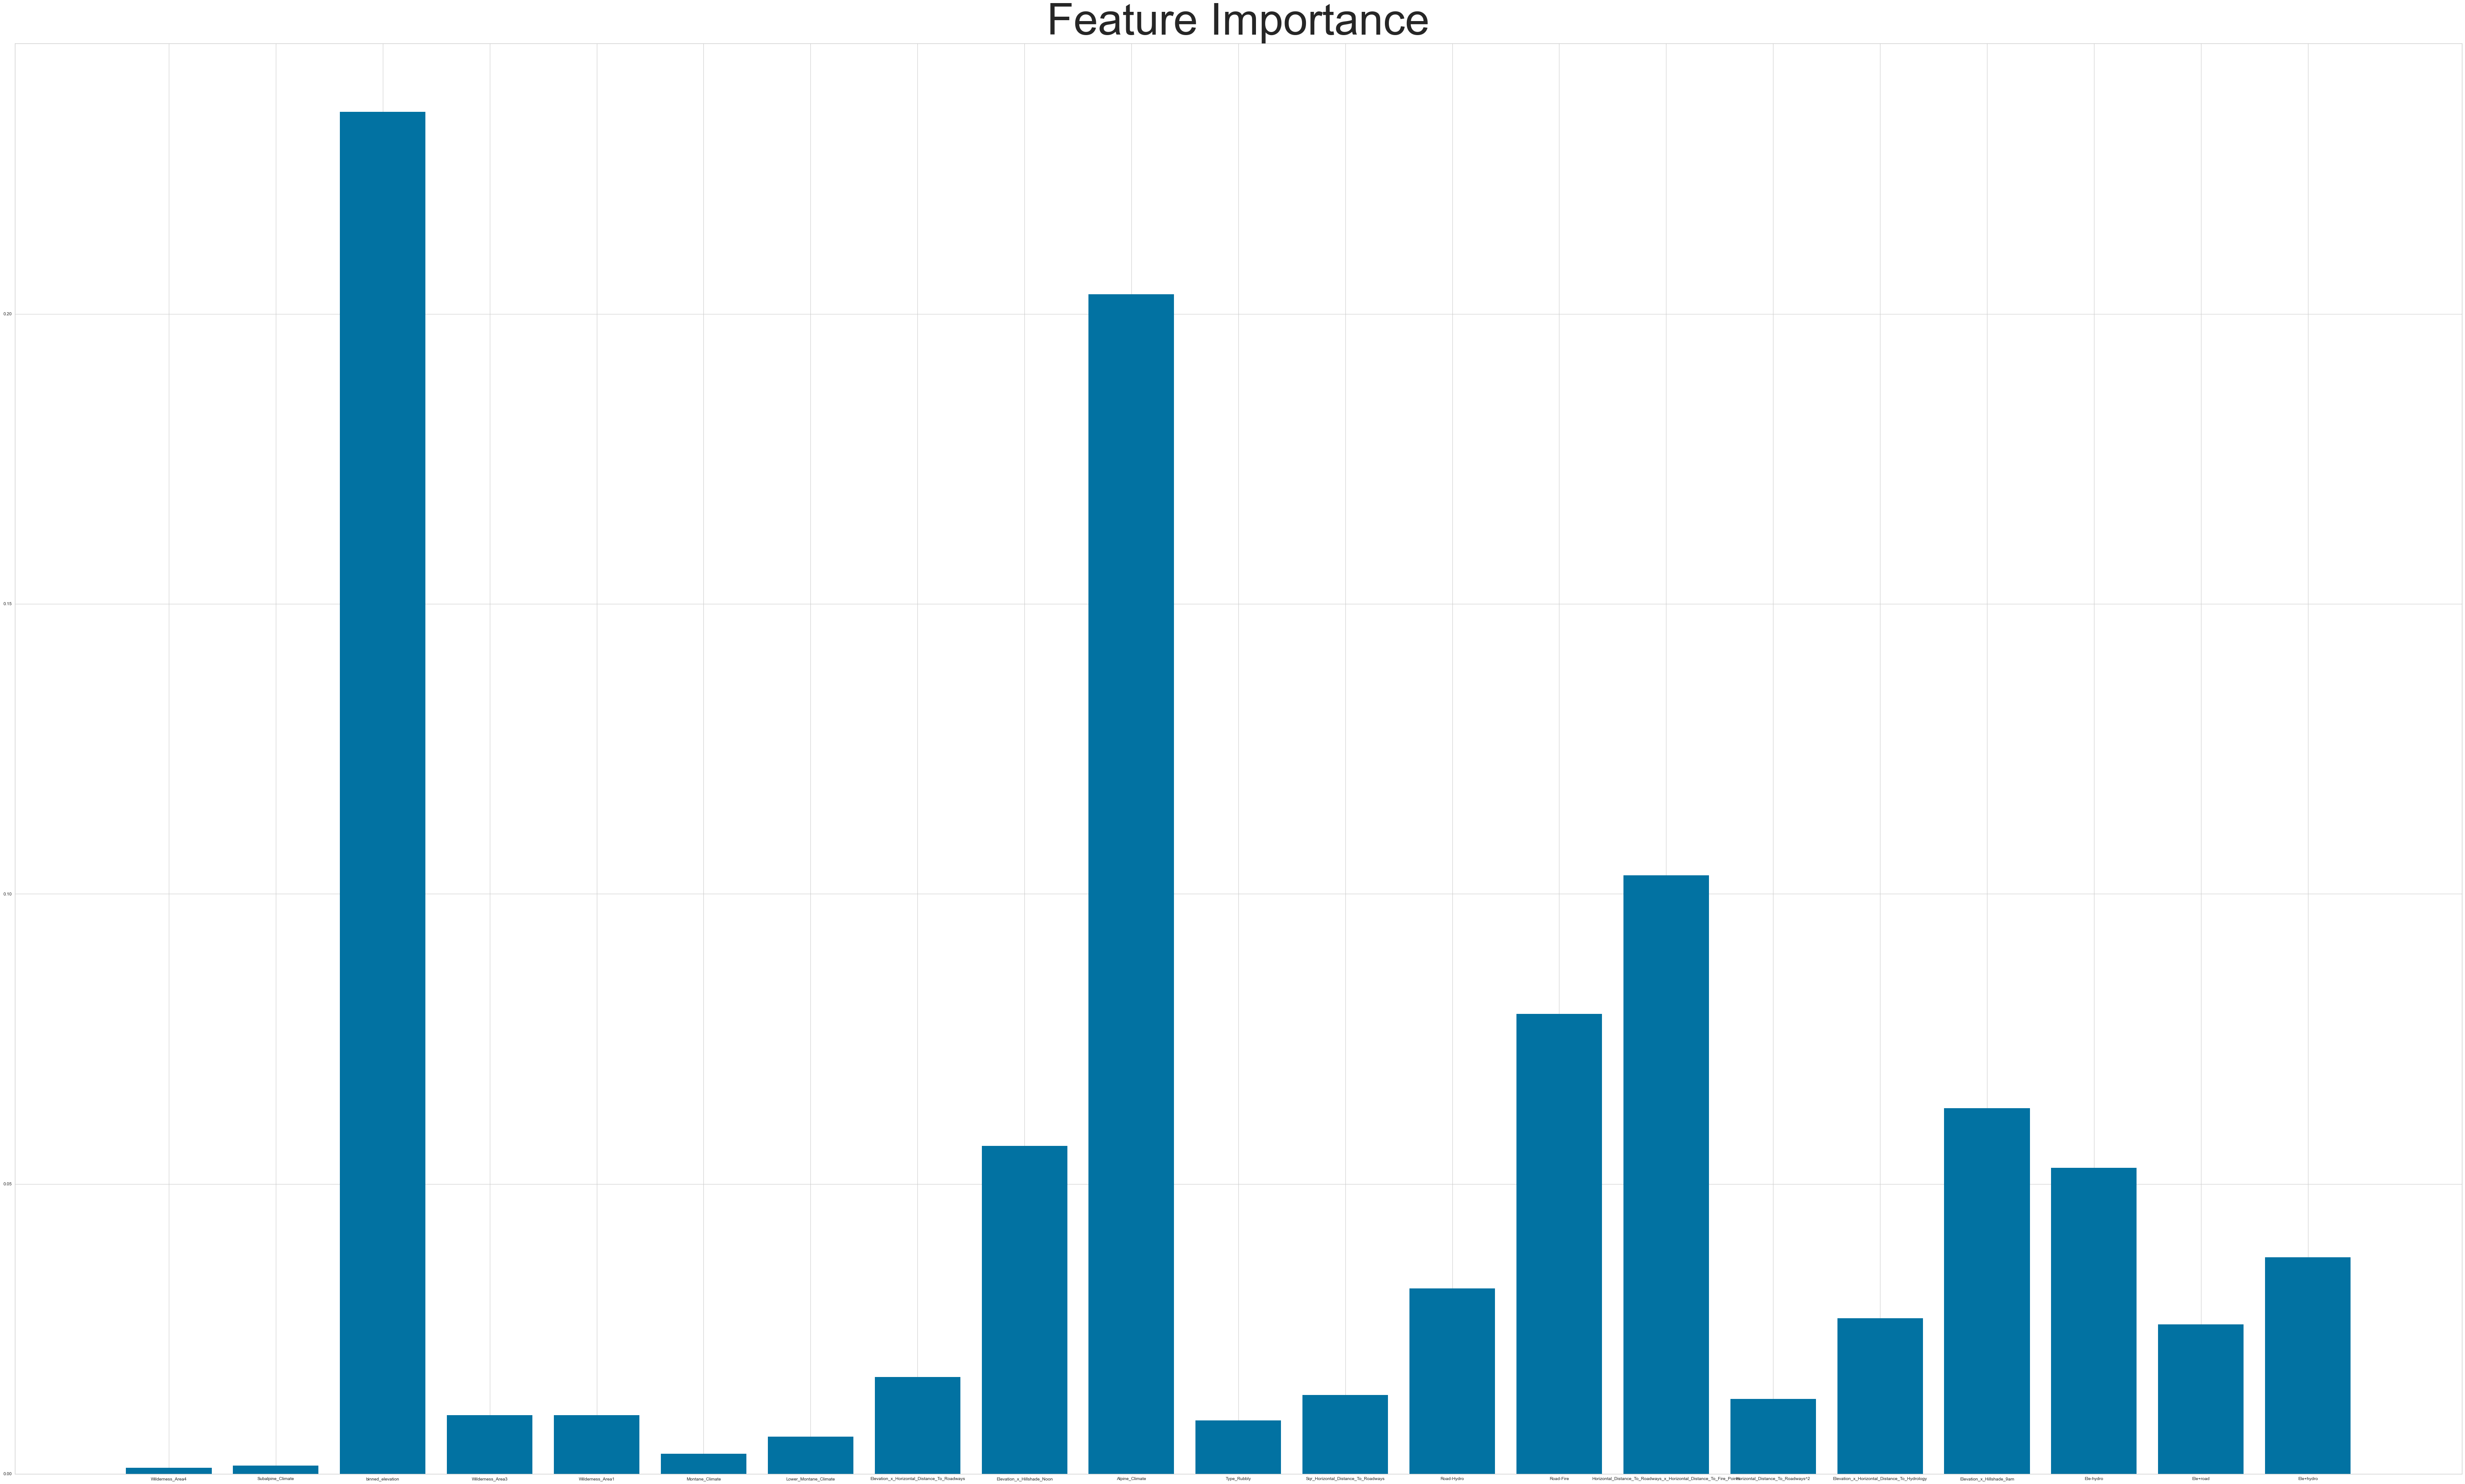

In [40]:
plt.figure(figsize=(100,60))
tree_bagging.fit(X_train_new,y_train_new)
plt.bar(X_train_new.columns, tree_bagging.feature_importances_)
plt.title('Feature Importance', fontsize=100);

In [41]:
random_forest = RandomForestRegressor(random_state=42, max_features='sqrt')
print("MSE = {0:.4f}".format(-np.mean(cross_val_score(random_forest, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 0.9747


# Single Tree (Classifier)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree_classifier = DecisionTreeClassifier(random_state=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_classifier, X_train_new, y_train_new))))

Accuracy = 0.7770


## Cross-Validation for optimal size

In [44]:
param_grid = {'max_depth': range(1,30)}

tree_classifier_pruned_cv = GridSearchCV(tree_classifier, 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=-1, verbose=1)

tree_classifier_pruned_cv.fit(X_train_new,y_train_new)
print("Best parameters set found on development set:")
print()
print(tree_classifier_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = tree_classifier_pruned_cv.cv_results_['mean_test_score']
stds = tree_classifier_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree_classifier_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Best parameters set found on development set:

{'max_depth': 14}

Grid scores on development set:

Accuracy = 0.286 (+/0.001) for {'max_depth': 1}
Accuracy = 0.458 (+/0.011) for {'max_depth': 2}
Accuracy = 0.617 (+/0.013) for {'max_depth': 3}
Accuracy = 0.668 (+/0.017) for {'max_depth': 4}
Accuracy = 0.686 (+/0.021) for {'max_depth': 5}
Accuracy = 0.704 (+/0.017) for {'max_depth': 6}
Accuracy = 0.724 (+/0.022) for {'max_depth': 7}
Accuracy = 0.744 (+/0.020) for {'max_depth': 8}
Accuracy = 0.755 (+/0.015) for {'max_depth': 9}
Accuracy = 0.766 (+/0.008) for {'max_depth': 10}
Accuracy = 0.775 (+/0.020) for {'max_depth': 11}
Accuracy = 0.777 (+/0.018) for {'max_depth': 12}
Accuracy = 0.778 (+/0.016) for {'max_depth': 13}
Accuracy = 0.781 (+/0.018) for {'max_depth': 14}
Accuracy = 0.781 (+/0.013) for {'max_depth': 15}
Accuracy = 0.778 (+/0.011) for {'max_depth': 16}
Accuracy = 0.779 (+/0.016) for {'max_depth': 17}
Accuracy = 0.77

Best Accuracy with depth 24 --> 0.779

In [45]:
tree_classifier_pruned = DecisionTreeClassifier(random_state=42, max_depth=24)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_classifier_pruned, X_train_new, y_train_new))))

Accuracy = 0.7765


## <font color=green> 7.1. XGB Boost  <font>

In [46]:
#!pip install xgboost

In [47]:
import xgboost as xgb
from xgboost import XGBClassifier

#import warnings
#warnings.filterwarnings('ignore')

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train1 = le.fit_transform(y_train_new)
y_val1 = le.fit_transform(y_val_new)

In [49]:
## First run, hyperparameters

In [50]:
xgboost = xgb.XGBClassifier(learning_rate=0.1, gamma=5, alpha=1, max_depth=2, verbosity=0, random_state=42, n_jobs=-1)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost, X_train_new, y_train1))))

Accuracy = 0.7302


Best model

In [51]:
xgboost2 = xgb.XGBClassifier (missing=np.nan, max_depth=10, n_estimators=350, learning_rate=0.03, nthread=4, subsample=0.95, colsample_bytree=0.85, seed=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost2, X_train_new, y_train1))))

Accuracy = 0.8584


In [52]:
# fitting
xgboost2.fit(X_train_new, y_train1, early_stopping_rounds=40, eval_metric="merror", eval_set=[(X_val_new, y_val1)])
pred = xgboost2.predict(X_val_new)

accuracy = accuracy_score(y_val1, pred);
print ('accuracy:%0.2f%%'%(accuracy*100))

[0]	validation_0-merror:0.23082


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-merror:0.21462
[2]	validation_0-merror:0.20403
[3]	validation_0-merror:0.20073
[4]	validation_0-merror:0.20337
[5]	validation_0-merror:0.20007
[6]	validation_0-merror:0.20073
[7]	validation_0-merror:0.20238
[8]	validation_0-merror:0.19940
[9]	validation_0-merror:0.19775
[10]	validation_0-merror:0.19974
[11]	validation_0-merror:0.19874
[12]	validation_0-merror:0.19577
[13]	validation_0-merror:0.19511
[14]	validation_0-merror:0.19643
[15]	validation_0-merror:0.19775
[16]	validation_0-merror:0.19709
[17]	validation_0-merror:0.19610
[18]	validation_0-merror:0.19544
[19]	validation_0-merror:0.19444
[20]	validation_0-merror:0.19444
[21]	validation_0-merror:0.19411
[22]	validation_0-merror:0.19411
[23]	validation_0-merror:0.19411
[24]	validation_0-merror:0.19511
[25]	validation_0-merror:0.19544
[26]	validation_0-merror:0.19610
[27]	validation_0-merror:0.19478
[28]	validation_0-merror:0.19345
[29]	validation_0-merror:0.19411
[30]	validation_0-merror:0.19213
[31]	validation_0-m

from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgboost, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
search.fit(X_train_new, y_train1)

# Extra Tree Classifier

In [56]:
# Build a forest and compute the feature importances
#n_estimators = list(range(50, 250,5))
n_estimators = [113]
criterion=['gini','entropy']
#min_samples_leaf = list(range(5, 25))
#min_samples_split = list(range(5, 25))
#max_depth = list(range(8, 50))
max_depth = [22]
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_estimators, criterion=criterion)

forest = ExtraTreesClassifier(random_state=0)
grid_etc = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc.fit(X_train_new, y_train_new)
print("The best score: ",grid_etc.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc.best_params_)
grid_etc.best_estimator_

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning:

The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.



The best score:  0.8672
The best parameter:  {'n_estimators': 113, 'criterion': 'gini'}


ExtraTreesClassifier(n_estimators=113, random_state=0)

In [58]:
#Find Feature importance
etc_selected = ExtraTreesClassifier(n_estimators=grid_etc.best_params_['n_estimators'],
                            criterion=grid_etc.best_params_['criterion'],random_state=0)
etc_selected.fit(X_train_new, y_train_new)
etc_sel_acc = etc_selected.score(X_val_new,y_val_new)
print("The accuracy score of the ExtraTreesClassifier with the selected features: ",round(etc_sel_acc,2))

The accuracy score of the ExtraTreesClassifier with the selected features:  0.87


In [59]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(etc_selected, X_train_new, y_train_new))))

Accuracy = 0.8672


In [60]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
 
params = {
    "n_estimators": [113], # best outcome of previous runs
    "max_depth": [22],     # best outcome of previous runs
    "min_samples_leaf": list(range(1, 100)),
}
 
forest_hyper = RandomizedSearchCV(forest, param_distributions=params, random_state=37, n_iter=150, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
forest_hyper.fit(X_train_new, y_train_new)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning:

The total space of parameters 99 is smaller than n_iter=150. Running 99 iterations. For exhaustive searches, use GridSearchCV.



Fitting 5 folds for each of 99 candidates, totalling 495 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=0),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'max_depth': [22],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'n_estimators': [113]},
                   random_state=37, return_train_score=True, verbose=1)

In [61]:
print("Best parameters set found on development set:")
print()
print(forest_hyper.best_params_)
print()
print("Grid scores on development set:")
print()
means = forest_hyper.cv_results_['mean_test_score']
stds = forest_hyper.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, forest_hyper.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:

{'n_estimators': 113, 'min_samples_leaf': 1, 'max_depth': 22}

Grid scores on development set:

Accuracy = 0.864 (+/0.004) for {'n_estimators': 113, 'min_samples_leaf': 1, 'max_depth': 22}
Accuracy = 0.849 (+/0.006) for {'n_estimators': 113, 'min_samples_leaf': 2, 'max_depth': 22}
Accuracy = 0.833 (+/0.010) for {'n_estimators': 113, 'min_samples_leaf': 3, 'max_depth': 22}
Accuracy = 0.823 (+/0.006) for {'n_estimators': 113, 'min_samples_leaf': 4, 'max_depth': 22}
Accuracy = 0.814 (+/0.006) for {'n_estimators': 113, 'min_samples_leaf': 5, 'max_depth': 22}
Accuracy = 0.804 (+/0.010) for {'n_estimators': 113, 'min_samples_leaf': 6, 'max_depth': 22}
Accuracy = 0.796 (+/0.007) for {'n_estimators': 113, 'min_samples_leaf': 7, 'max_depth': 22}
Accuracy = 0.791 (+/0.005) for {'n_estimators': 113, 'min_samples_leaf': 8, 'max_depth': 22}
Accuracy = 0.785 (+/0.008) for {'n_estimators': 113, 'min_samples_leaf': 9, 'max_depth': 22}
Accuracy = 0.780 (+/

In [62]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
 
params = {
    "max_depth": list(range(8, 50)),
}
 
forest_hyper = RandomizedSearchCV(forest, param_distributions=params, random_state=37, n_iter=150, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
forest_hyper.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning:

The total space of parameters 42 is smaller than n_iter=150. Running 42 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=0),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27, 28, 29, 30, 31, 32,
                                                      33, 34, 35, 36, 37, ...]},
                   random_state=37, return_train_score=True, verbose=1)

In [63]:
print("Best parameters set found on development set:")
print()
print(forest_hyper.best_params_)
print()
print("Grid scores on development set:")
print()
means = forest_hyper.cv_results_['mean_test_score']
stds = forest_hyper.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, forest_hyper.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 28}

Grid scores on development set:

Accuracy = 0.728 (+/0.011) for {'max_depth': 8}
Accuracy = 0.752 (+/0.011) for {'max_depth': 9}
Accuracy = 0.774 (+/0.006) for {'max_depth': 10}
Accuracy = 0.797 (+/0.010) for {'max_depth': 11}
Accuracy = 0.814 (+/0.005) for {'max_depth': 12}
Accuracy = 0.827 (+/0.007) for {'max_depth': 13}
Accuracy = 0.840 (+/0.005) for {'max_depth': 14}
Accuracy = 0.846 (+/0.008) for {'max_depth': 15}
Accuracy = 0.853 (+/0.008) for {'max_depth': 16}
Accuracy = 0.856 (+/0.006) for {'max_depth': 17}
Accuracy = 0.860 (+/0.004) for {'max_depth': 18}
Accuracy = 0.862 (+/0.004) for {'max_depth': 19}
Accuracy = 0.863 (+/0.002) for {'max_depth': 20}
Accuracy = 0.863 (+/0.005) for {'max_depth': 21}
Accuracy = 0.863 (+/0.004) for {'max_depth': 22}
Accuracy = 0.865 (+/0.001) for {'max_depth': 23}
Accuracy = 0.866 (+/0.004) for {'max_depth': 24}
Accuracy = 0.865 (+/0.003) for {'max_depth': 25}
Accuracy = 0.866 (+/0

In [64]:
tree = DecisionTreeClassifier(random_state=18)
model_tree = tree.fit(X_train_new, y_train_new)

In [65]:
y_pred_tr = tree.predict(X_train_new)
y_pred_ts = tree.predict(X_val_new)

In [66]:
print("Training Results:\n")
print(classification_report(y_train_new, y_pred_tr))
print("\nTesting Results:\n")
print(classification_report(y_val_new, y_pred_ts))

Training Results:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1728
           2       1.00      1.00      1.00      1728
           3       1.00      1.00      1.00      1728
           4       1.00      1.00      1.00      1728
           5       1.00      1.00      1.00      1728
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1728

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096


Testing Results:

              precision    recall  f1-score   support

           1       0.64      0.64      0.64       432
           2       0.56      0.57      0.56       432
           3       0.72      0.66      0.69       432
           4       0.91      0.92      0.91       432
           5       0.85      0.79      0.82       432
           6       0.69      0.76      0

In [ ]:
y_val_new

In [ ]:
plot_ROC_curve(model_tree, X_train_new.values,y_train_new, X_val_new.values, y_val_new)

Random Forest

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [68]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_new,y_train_new)

In [69]:
forest.score(X_val_new,y_val_new)

0.8442460317460317

In [70]:
# Make predictions for the test set
y_pred_test_forest = forest.predict(X_val_new)

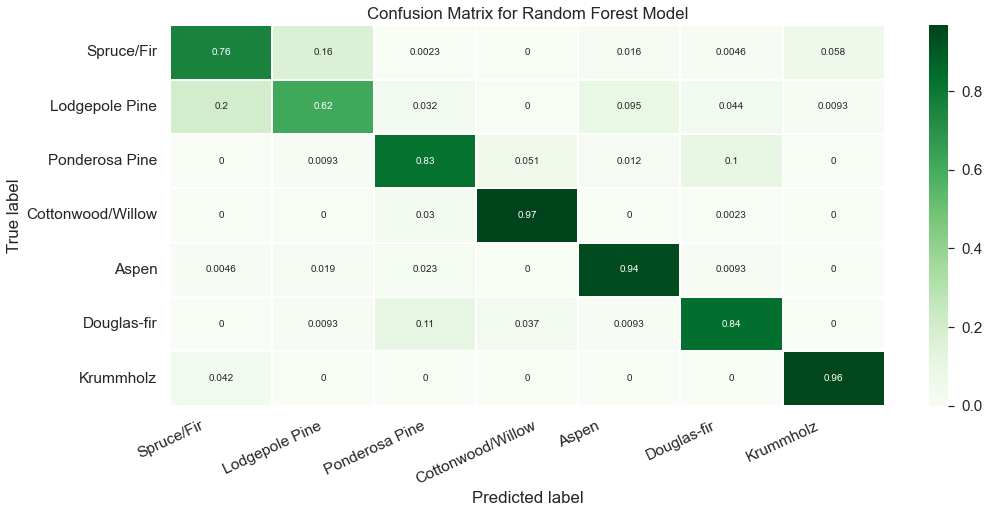

In [71]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val_new, y_pred_test_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [72]:
print(classification_report(y_val_new, y_pred_test_forest))

              precision    recall  f1-score   support

           1       0.75      0.76      0.76       432
           2       0.76      0.62      0.68       432
           3       0.81      0.83      0.82       432
           4       0.92      0.97      0.94       432
           5       0.88      0.94      0.91       432
           6       0.84      0.84      0.84       432
           7       0.93      0.96      0.95       432

    accuracy                           0.84      3024
   macro avg       0.84      0.84      0.84      3024
weighted avg       0.84      0.84      0.84      3024



In [73]:
forest = RandomForestClassifier(n_estimators=20, random_state=37)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(forest, X_train_new, y_train_new))))

Accuracy = 0.8466


### <font color=green> 7.1.2. Bagging <font>

In [74]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, 
                               bootstrap=True, n_jobs = 1)
bag_clf.fit(X_train_new, y_train_new)
y_pred = bag_clf.predict(X_val_new)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(bag_clf, X_train_new, y_train_new))))

Accuracy = 0.7095


In [75]:

X = X_train_new
y = y_train_new
tree_1 = DecisionTreeClassifier(random_state=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_1, X, y))))

Accuracy = 0.7770


Get a low accuracy with correlated features, I try below with a different split set (taking out correlated features)

An even worse accuracy... Let's see how the tree looks like

## <font color=green> 7.1. Random Forest   <font>

## <font color=green> 7.1. XGB Boost  <font>

## <font color=green> 7.1. KNN  <font>
KNN is better on smaller dataset, however we will evaluate the performance of this model 

In [77]:
from sklearn.neighbors import KNeighborsClassifier

To find out the best value for k we will use a for loop, and with the range from 1 to 200 range (1,200,10). I reduced the range to 10 but will use iterations of 1. And it gives me the best K = 1. 

In [78]:
k_neighbors_list = range (1,100,1)

results_list = []

for k in k_neighbors_list:
    clf = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    clf.fit(X_train_new, y_train_new)
    y_pred_test = clf.predict(X_val_new)
    acc_k = accuracy_score(y_val_new, y_pred_test)
    
    results_list.append({
        "k": k,
        "acc": acc_k
    })
    
results = pd.DataFrame(results_list)

p = 1 (Manhatten Distance), the best k = 8 with accuracy= 0.759259
p = 2 (Euclidean Distance), the best k = 1 with accuracy = 0.761905

Checking the best value for K and accuracy 

In [79]:
test = results.sort_values('acc', ascending = False) 
test

,k,acc
0,1,0.866402
2,3,0.849206
4,5,0.848545
3,4,0.846892
1,2,0.842593
...,...,...
95,96,0.730489
96,97,0.729828
92,93,0.729497
98,99,0.729167


Text(0, 0.5, 'Testing Accuracy')

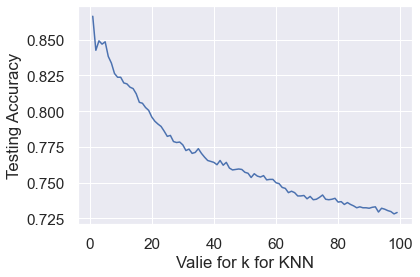

In [80]:
plt.plot(results['k'],results['acc'])
plt.xlabel('Valie for k for KNN')
plt.ylabel('Testing Accuracy')

In [81]:
k_neighbors_list = range (1,40,1)

K_scores = []

for k in k_neighbors_list:
    # Run KNeighborsClassifier with k neighbours 
    knn = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    # Obtain Cross_val_score for KneighborsClassifier with k neighbors 
    scores = cross_val_score(knn,X_train_new, y_train_new, cv= 5, scoring= "accuracy")
    # Append mean of scores for K neighbors to k_scores list 
    K_scores.append({
        "k": k,
        "acc": scores.mean
    })
    
results = pd.DataFrame(K_scores)

In [82]:
#test = results.sort_values(K_scores, ascending = False) 
#test

Using Grridsearch and cross validation we will adapt the model. <br>
We first create a KNN classifier instance and then prepare a range of values of hyperparameter K from 1 to 31 that will be used by GridSearchCV to find the best value of K.

Furthermore, we set our cross-validation batch sizes cv = 5 and set scoring metrics as accuracy as our preference.

In [83]:
cross_valid_scores = {}
parameters = {
    "n_neighbors": list(range(1,20,1)),
    "leaf_size":list(range(1,100,20)),
    "metric":["euclidean","manhattan"]    
}

model_KNN = KNeighborsClassifier()

model_KNN = GridSearchCV(
    model_KNN,
    parameters,
    cv=5,
    scoring = "accuracy"

)
KNN_results = model_KNN.fit(X_train_new, y_train_new)

In [84]:
KNN_results.best_score_
KNN_results.best_estimator_
KNN_results.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1}

In [85]:
accuracy = KNN_results.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 85.41%


In [120]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(model_KNN, X_train_new, y_train_new))))

Accuracy = 0.8514


In [121]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(model_KNN, X_val_new, y_val_new))))

Accuracy = 0.7788


Using the best model to calculate the mean cross validation score to compare the model later with each other

In [86]:
knn = KNeighborsClassifier(n_neighbors=1,leaf_size=1,metric='euclidean')

scores = cross_val_score(knn, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [87]:
print("Accuracy = {0:.4f}\n".format(accuracy_score(model_KNN.predict(X_val_new), y_val_new)))
print("Classification Report")
print(classification_report(model_KNN.predict(X_val_new), y_val_new))

Accuracy = 0.8664

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.80      0.77       402
           2       0.65      0.76      0.70       367
           3       0.84      0.88      0.86       410
           4       0.99      0.94      0.96       456
           5       0.98      0.87      0.92       489
           6       0.89      0.86      0.87       448
           7       0.98      0.94      0.96       452

    accuracy                           0.87      3024
   macro avg       0.87      0.86      0.86      3024
weighted avg       0.88      0.87      0.87      3024



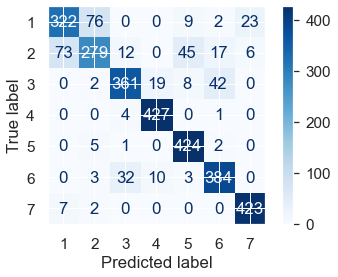

In [88]:
plot_confusion_matrix(model_KNN,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [89]:
classifiers_compare = classifiers_compare.append({'Algorithm': "KNN", 'Mean CV Score':(scores.mean())},ignore_index=True)

kNN is simple to use and can return very accurate and meaningful results. It also has a tendency to be computationally expensive, so it may not be your best choice for larger datasets. 

## <font color=green> 7.1. SVM  <font>
The multiclass problem is broken down to multiple binary classification cases, which is also called one-vs-one. In scikit-learn one-vs-one is not default and needs to be selected explicitly (as can be seen further down in the code). One-vs-rest is set as default. It basically divides the data points in class x and rest. Consecutively a certain class is distinguished from all other classes.  The penalty term C is set to 1 for all classifiers. For the multiclass classification, the type one-versus-one is specified, as can be seen in decision_function_shape=’ovo’

In [90]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(svm.SVC(C=10,kernel='rbf'))
ovr_clf.fit(X_train_new, y_train_new)
print("SVM Accuracy = {:.4f}".format(np.mean(cross_val_score(ovr_clf, X_train_new, y_train_new))))

SVM Accuracy = 0.7908


The Model output is not very good, lets fine tune the SVM parameters to further improve the model performance. 
_C_ is the balance between margin violations (low C) or better generalization of the models. _Gamma_ acts like a regularization hyperparamter. If the model is overfitting it is advisable to redeuce it.If it is underfitting you should increase it. The best Kernel to use if the dataset is large is _Gaussoan RBF kernel_. Since we already used Polynominal in our dataset we will disregard this option. 

In [91]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score


model_to_set = OneVsRestClassifier(SVC(kernel="rbf"))

parameters = {
    "estimator__C": [1,10,100],
    "estimator__gamma":[0.01,0.0001,0.00001],
}

estimator = GridSearchCV(model_to_set, param_grid=parameters, cv=5, n_jobs=-1)

estimator.fit(X_train_new, y_train_new)

print(estimator.best_score_)
print (estimator.best_params_)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



0.7500826446280991
{'estimator__C': 100, 'estimator__gamma': 0.01}


The best parameters are {'estimator__C': 100, 'estimator__gamma': 0.01} with a score of 0.75


/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_5728/3024039189.py:14: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



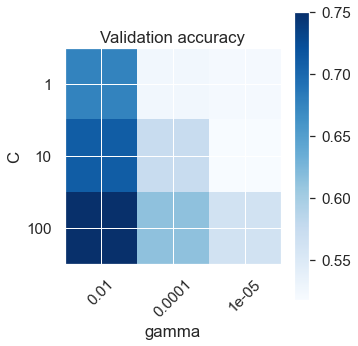

In [92]:
print("The best parameters are %s with a score of %0.2f"
      % (estimator.best_params_, estimator.best_score_))


scores = estimator.cv_results_['mean_test_score'].reshape(len(parameters['estimator__C']), len(parameters['estimator__gamma']))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(5, 5))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(parameters['estimator__gamma'])), parameters['estimator__gamma'], rotation=45)
plt.yticks(np.arange(len(parameters['estimator__C'])), parameters['estimator__C'])
plt.title('Validation accuracy')
plt.show()

In [93]:
final_model = estimator.best_estimator_
Y_pred = final_model.predict(X_val_new)
print("Training set score for SVM: %f" % final_model.score(X_train_new , y_train_new))
print("Testing  set score for SVM: %f" % final_model.score(X_val_new  , y_val_new ))

Training set score for SVM: 0.765956
Testing  set score for SVM: 0.749669


In [94]:
scores = cross_val_score(final_model, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [95]:
print(classification_report(final_model.predict(X_val_new), y_val_new))

              precision    recall  f1-score   support

           1       0.75      0.67      0.71       483
           2       0.40      0.73      0.51       237
           3       0.61      0.70      0.65       378
           4       0.95      0.82      0.88       501
           5       0.89      0.74      0.81       524
           6       0.71      0.68      0.69       450
           7       0.93      0.89      0.91       451

    accuracy                           0.75      3024
   macro avg       0.75      0.75      0.74      3024
weighted avg       0.78      0.75      0.76      3024



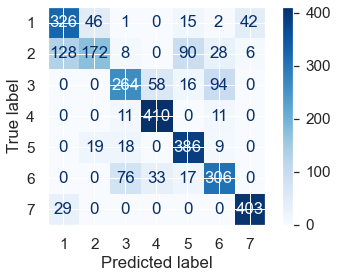

In [96]:
plot_confusion_matrix(final_model,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [97]:
classifiers_compare = classifiers_compare.append({'Algorithm': "SVM", 'Mean CV Score':(scores.mean())},ignore_index=True)

## <font color=green> 7.1. Naive Bayes  <font>

Since we have a classification problem with multiple discrete values we use the multinominal Naive Bayes method

## <font color=green> 6.6. Logistic Regression <font>

In [98]:
df_logist.shape

(15120, 9)

In [99]:
y_train_new.shape

(12096,)

In [100]:
y_train_log = y_train_log.values.ravel()
y_val_log = y_val_log.values.ravel()

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/skle

0.17063492063492064

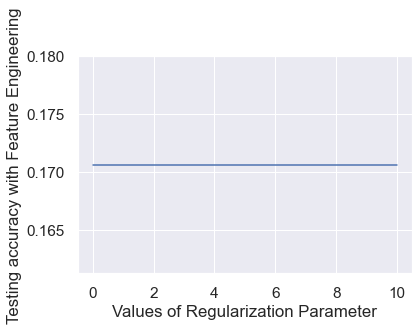

In [101]:
#Run Logistic Regression with only the New PCA reduced dataset provided & L1 Regularization
C_range=[0.001,0.01,0.02,0.05,0.06,0.08,1,2,3,5,10]
scores_logreg=[]
for c in C_range:
    #Saga is good for larger Datasets 
    logreg = LogisticRegression(C=c, penalty ='l1', solver='saga', multi_class='multinomial',max_iter=5000)
    logreg.fit(X_train_log, y_train_log)
    y_pred = logreg.predict(X_val_log)
    scores_logreg.append(metrics.accuracy_score(y_val_log,y_pred))

    
#Plot Logistic Regression with only the data provided
plt.plot(C_range,scores_logreg)
plt.xlabel("Values of Regularization Parameter")
plt.ylabel("Testing accuracy with Feature Engineering")
max(scores_logreg)

## <font color=green> 6.6. Ensemble methods<font>
### <font color=green> 6.6. Voting Classifier<font>
    
A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes 

In [ ]:
def make_nn_classifier():
    model = Sequential()
    model.add(Dense(30, input_dim=46, activation='relu'))
    model.add(Dense(35, input_dim=30, activation='relu'))
    model.add(Dense(20, input_dim=35, activation='relu'))
    model.add(Dense(7, input_dim=20, activation='softmax'))
    ## Cost function & Objective (and solver)
    sgd = optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#Ensembling Neural net,Adaboost, Logistic Regression and Extra Trees Classifier


etc_ensemble = ExtraTreesClassifier(n_estimators=grid_etc.best_params_['n_estimators'],
                            criterion=grid_etc.best_params_['criterion'],random_state=0)


knn_ensemble = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),
                            learning_rate=KNN_results.best_params_['leaf_size'],
                             n_estimators=KNN_results.best_params_['metric'],
                            n_neighbors=KNN_results.best_params_['metric']   
                                 )

KNN_results.best_params_
voting_ensemble = VotingClassifier(estimators=[('lr', logreg_ensemble), ('etc', etc_ensemble),('nn', nn_ensemble),
                                              ('ada', ada_ensemble)],voting='hard')

'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1

voting_ensemble.fit(X_train_final_selected, y_train)
y_pred_ensemble = voting_ensemble.predict(X_val_final_selected)
print("Accuracy achieved by ensembling",metrics.accuracy_score(y_val,y_pred_ensemble))

In [102]:
log_clf = LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 2000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(gamma ='auto', probability = True)
dtc_clf = DecisionTreeClassifier()

estimator = []
estimator.append(('LR', log_clf))
estimator.append(('RF', rnd_clf))
estimator.append(('SVC', svm_clf))
estimator.append(('DTC', dtc_clf))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
vot_hard.fit(X_train_new, y_train_new)
y_pred = vot_hard.predict(X_val_new)

for clf in (log_clf,rnd_clf,dtc_clf, vot_hard):
    clf.fit(X_train_new, y_train_new)
    y_pred = clf.predict(X_val_new)
    print(clf.__class__.__name__, accuracy_score(y_val_new,y_pred))
  

LogisticRegression 0.6941137566137566
RandomForestClassifier 0.8548280423280423
DecisionTreeClassifier 0.7609126984126984
VotingClassifier 0.8138227513227513


In [103]:
classifiers_compare

,Algorithm,Mean CV Score
0,KNN,0.855739
1,SVM,0.753635


## <font color=green> 6.6. Ensemble methods<font>

## <font color=purple> 6.6. Dimensionality reduction with PCA <font>

Principal component analysis (PCA) as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible. Principle components capture most of the variance of the data. The first principle components hold the most variance in the data, Each subsequent PCS is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples, you achieve a set of uncorrelated PCS over the same y samples. We are running it on the dataset where we have all seleted features and will use PCA to identify the most important features. For the visualization part we are using https://plotly.com/python/pca-visualization/. 

Using the first 2 principle components show that the data with 2 PCAs is very well deferiantiated. We are using all features to test it against the initial selected features from the previous models. 

In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import metrics


# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

With only two PCA you can nicely see how well the data is differentiated among the different Cover Types. 

In [105]:
# First we will observe with a 3D Diagram the first three PCAs
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(X_train_new)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train_new,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [106]:
# Run PCA that holds 95% of all variance of the data 
from sklearn.decomposition import PCA
pca = PCA()
x_fit = pca.fit(X_train_new)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.98)+1

Looking at the two first PCA to see if these can explain the dataset.You can set the components to the ratio of variance you wish to preserve

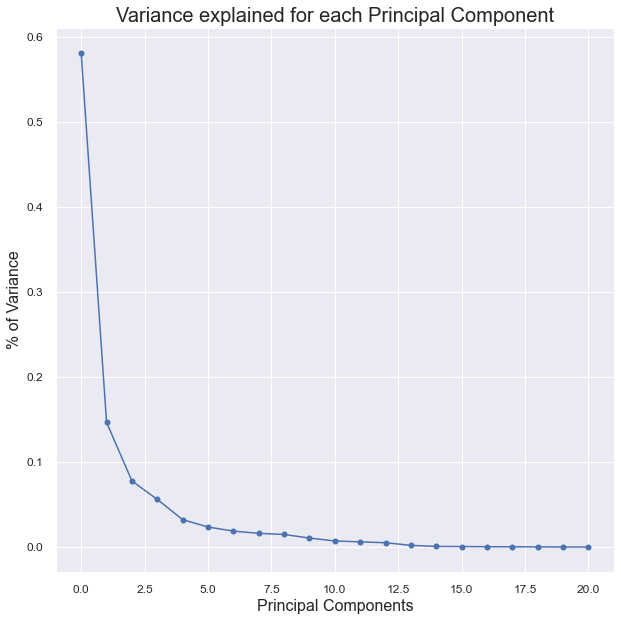

In [107]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variance explained for each Principal Component", fontsize=20)
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components", fontsize=16)
plt.ylabel("% of Variance", fontsize=16);

In [108]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# of Principle Components", "y": "Cumulative Explained Variance"})

It is a bar chart where the height of each bar is the percentage of variance explained by the associated PC. 

Text(0, 0.5, 'Proportion of Variance Explained')

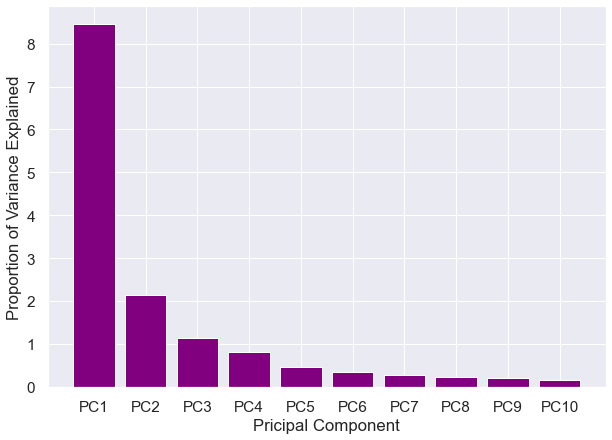

In [109]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(10,7))
plt.bar(labels,var,color=['purple'])
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

On top of that, we can also look at the combinations of variables that created each principal component with pca. We could use a heat map to showcase the correlation betweem the PCAs between each other. 

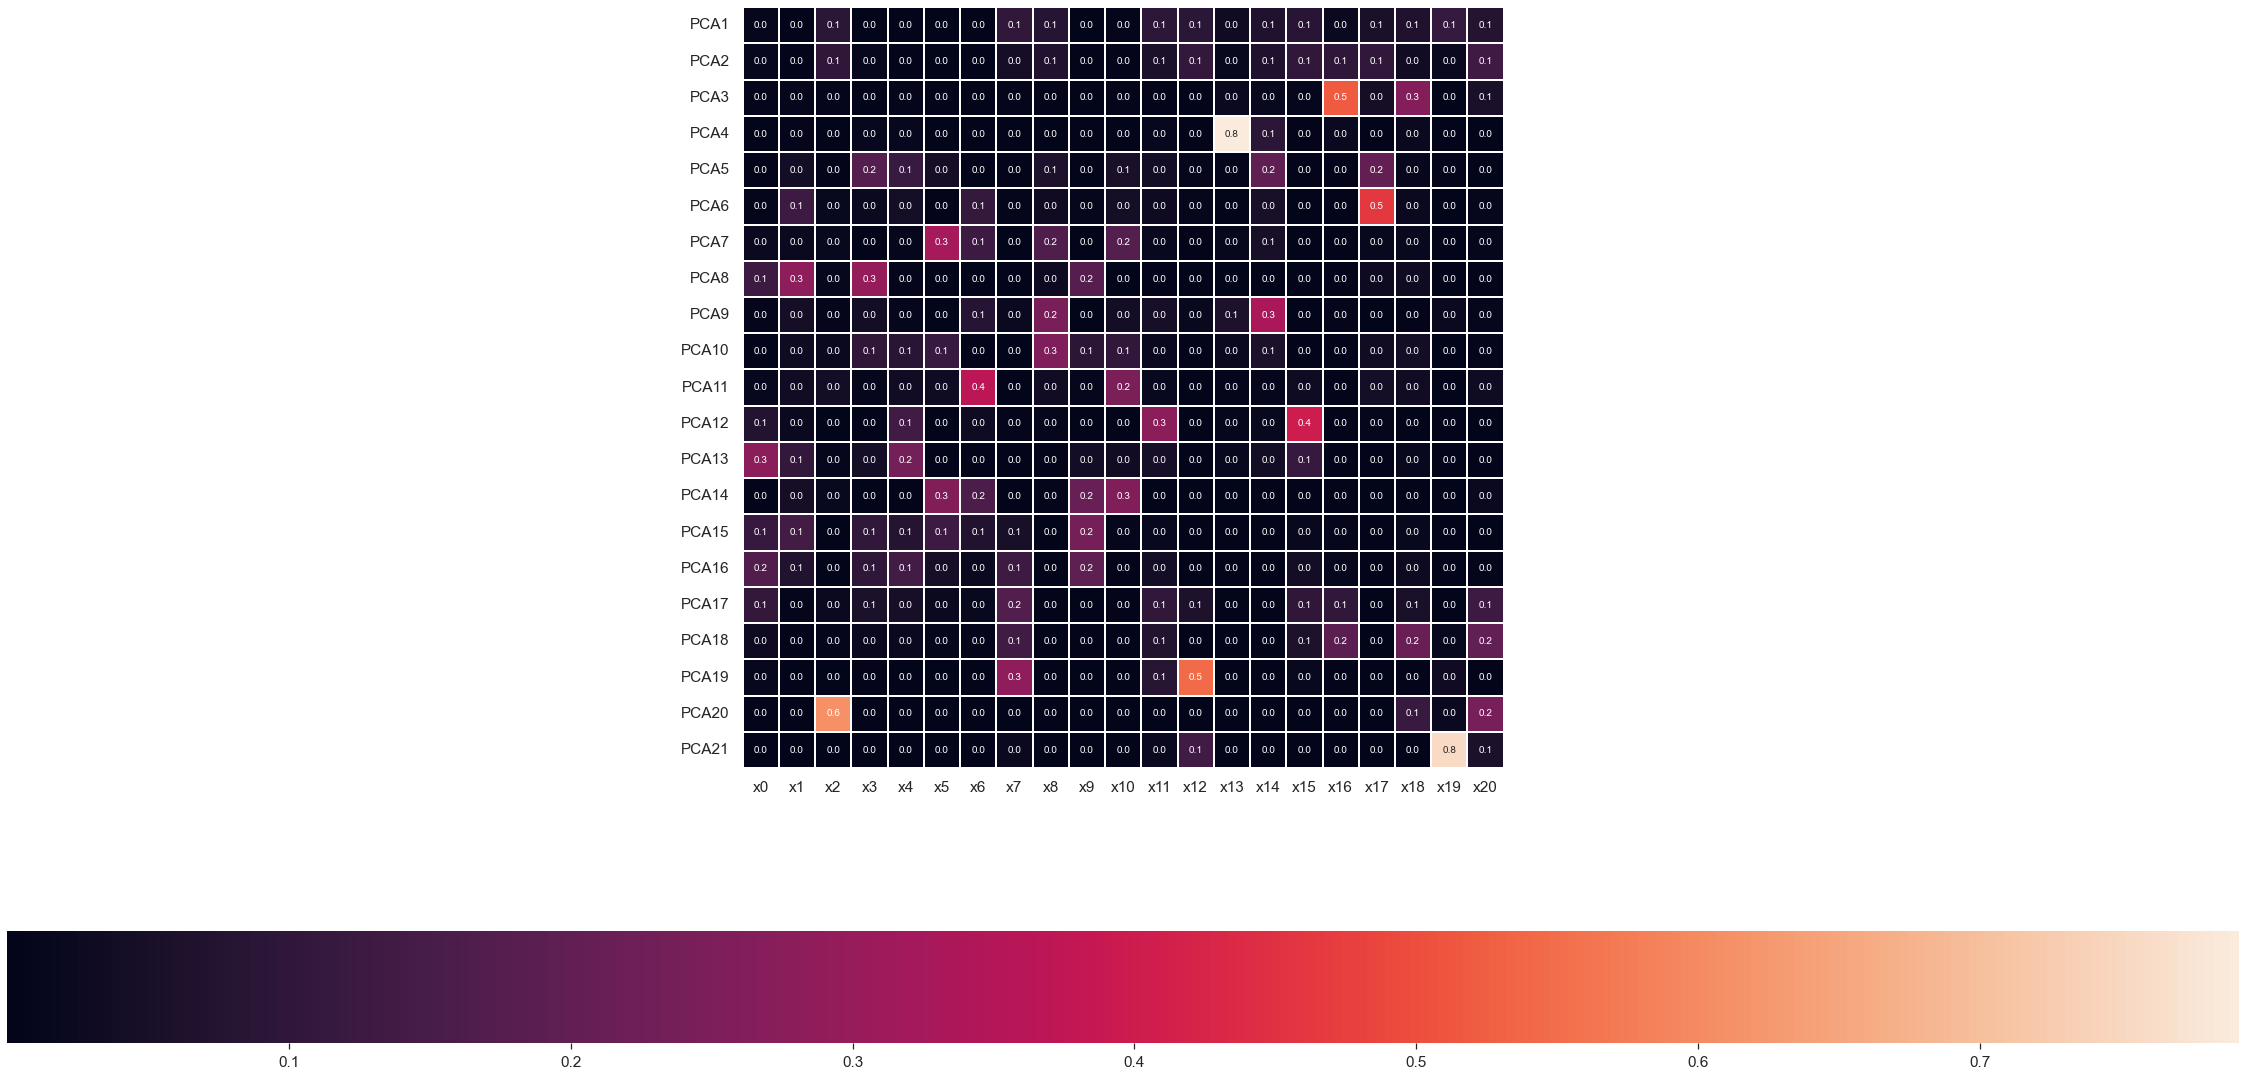

In [110]:
#Heatmap PCA
fig, ax = plt.subplots(figsize=(40,20)) 
col_name = ['x' + str(idx) for idx in range(0, X_train_new.shape[1])]

_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.1f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [111]:
pca_ratio = pca.explained_variance_ratio_
pca_ratio_tranposed = list(map(list, zip(*[pca_ratio])))
df = pd.DataFrame(data = np.array(pca_ratio_tranposed), columns = ['PCA Variance Explained'])
df['PCA Variance Explained Cumulative'] = df['PCA Variance Explained'].cumsum()
df.index += 1
df

,PCA Variance Explained,PCA Variance Explained Cumulative
1,0.581305,0.581305
2,0.146659,0.727964
3,0.077723,0.805687
4,0.055997,0.861683
5,0.032253,0.893937
6,0.023533,0.917469
7,0.018721,0.936190
8,0.016105,0.952295
9,0.014752,0.967046
10,0.010547,0.977593


Looks Like most variance (99.1%) is explained once we reach 12 principal components, so let’s create training and validation data sets using the first 12 principal components

In [112]:
pca_mod = PCA(n_components=12)
PCA_X_train_final_selected = pca_mod.fit_transform(X_train_new)
PCA_X_val_final_selected = pca_mod.fit_transform(X_val_new)
print("Size of the dimensionality reduced training dataset", PCA_X_train_final_selected.shape)
print("Size of the dimensionality reduced training dataset", PCA_X_val_final_selected.shape)

Size of the dimensionality reduced training dataset (12096, 12)
Size of the dimensionality reduced training dataset (3024, 12)


In [113]:
PCA_X_train_final_selected[0]

array([ 0.89474616, -1.01555369,  0.36212293,  0.10586923, -0.72079835,
       -0.84217641,  0.83717361, -0.26769549,  0.1398182 , -0.63367586,
       -0.18510037, -0.0464868 ])

Check which most important features were selected using PCA. 

In [114]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pca_mod = PCA(n_components=12)

model = pca_mod.fit(X_train_new)
X_pc = model.transform(X_train_new) 

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_train_new.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [115]:
df

,0,1
0,PC0,Ele+road
1,PC1,Ele+hydro
2,PC2,Elevation_x_Horizontal_Distance_To_Hydrology
3,PC3,Road-Fire
4,PC4,Elevation_x_Hillshade_9am
5,PC5,Elevation_x_Hillshade_9am
6,PC6,Montane_Climate
7,PC7,Wilderness_Area3
8,PC8,Horizontal_Distance_To_Roadways_x_Horizontal_D...
9,PC9,Elevation_x_Hillshade_Noon


# Everything Together

Let's use the pipeline to wrap everything together and to find the best configuration for the different hyper-parameters



In [116]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()), ('LDA', LinearDiscriminantAnalysis())]) # Pipeline the entire process: Scale the data -> PCA -> LDA Classifier

n_components = list(range(1,19)) # We will try different numbers of principal components

#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {"pca__n_components":n_components}

estimator = GridSearchCV(pipeline, param_grid, cv=5) # Create a grid search to try all the possible number of PCs
estimator.fit(X_train_new, y_train_new);

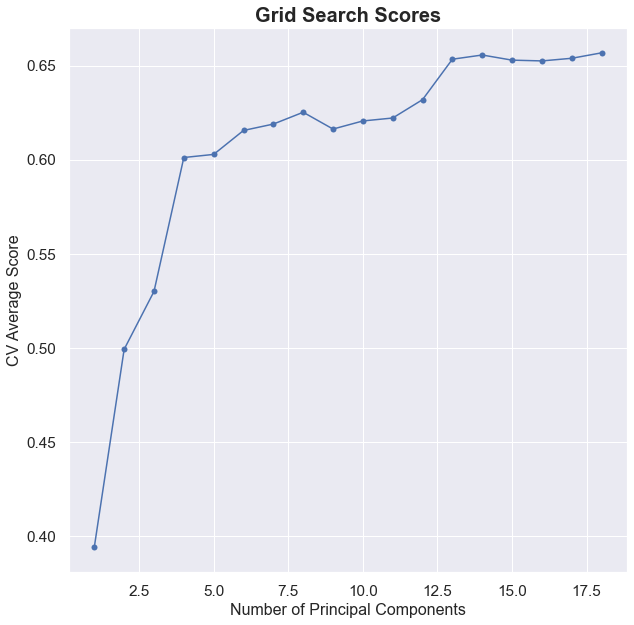

In [117]:
# Get Test Scores Mean and std for each grid search
scores_mean = estimator.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean)

scores_sd = estimator.cv_results_['std_test_score']
scores_sd = np.array(scores_sd)

# Plot Grid search scores
plt.figure(figsize=(10,10))
plt.plot(n_components, scores_mean, '-o')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel("Number of Principal Components", fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.grid('on')

As can be seen in the graph, the optimal number of PCs to select will 12 as this gives us the optimal CV score. The optimum is 12 and increasing the number of features does not add much value. 

Source codes: https://www.kaggle.com/code/maniyar2jaimin/interactive-plotly-guide-to-pca-lda-t-sne, https://github.com/dasaditi/machineLearning/blob/master/forestCover/ForestCover.ipynb

## <font color=purple> Random Forest with PCA<font>

In [118]:
from sklearn.model_selection import RandomizedSearchCV

Fine tuning the model and checking the performance of the PCA method

In [119]:
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_rf = dict(n_estimators=n_estimators,criterion=criterion)

# instantiate and fit the grid
rf = RandomForestClassifier()
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy' ,return_train_score=False)

grid_rf.fit(PCA_X_train_final_selected, y_train_new)

KeyboardInterrupt: 

In [ ]:
#Mean cross-validated score of the best_estimator
print("The best score: ",grid_rf.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_rf.best_params_)

In [ ]:
rf_final = RandomForestClassifier(criterion=grid_rf.best_params_['criterion'],
                            n_estimators=grid_rf.best_params_['n_estimators'])
rf_final.fit(PCA_X_train_final_selected,y_train_new)
rf_score=rf_final.score(PCA_X_val_final_selected,y_val_new)

print("The accuracy score of the RandomForest with reduced feature set: ",round(rf_score,2))

With cross validation you can see it overfits the train data und the result of the validation data is lower

In [ ]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(rf_final, PCA_X_val_final_selected, y_val_new))))

As you can see the model is overitting on the Training Set and has a lower score on the cross validation score.

In [ ]:
#the plot learning curve from sklearn works only if you add the definition of sklearn 


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:

cv = ShuffleSplit(n_splits=500, test_size=0.2, random_state=0)
title = "Learning Curves (Random Forest with PCA reduced dataset)"
plot_learning_curve(rf_final, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.show()


# <font color=purple> AdaBoost with PCA reduced Dataset<font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),algorithm='SAMME')

parameters = {'base_estimator__max_depth':[i for i in range(2,6,2)],
              'base_estimator__min_samples_leaf':[1,5],
              'n_estimators':[250,500,750],
              'learning_rate':[0.01,0.1]}

grid_ada_PCA = GridSearchCV(abc, parameters,verbose=1,scoring='neg_mean_squared_error',n_jobs=-1,cv=3)
grid_ada_PCA.fit(PCA_X_train_final_selected, y_train_new)


In [ ]:
#Estimator that was chosen by the search, i.e. estimator which gave highest score 
grid_ada_PCA.best_estimator_

In [ ]:
#Mean cross-validated score of the best_estimator
print("The best score: ",grid_ada_PCA.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_ada_PCA.best_params_)


In [ ]:
ada_final_PCA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,min_samples_leaf=1),
                            learning_rate=grid_ada_PCA.best_params_['learning_rate'],
                         n_estimators=grid_ada_PCA.best_params_['n_estimators'])

ada_final_PCA.fit(PCA_X_train_final_selected,y_train_new)
ada_acc_sel =ada_final_PCA.score(PCA_X_val_final_selected,y_val_new)
print("The accuracy score of the AdaBoostClassifier with PCA reduced feature set: ",round(ada_acc_sel,2))


## <font color=purple> XBoost Classifier<font>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_PCA = le.fit_transform(y_train_new)
y_val_PCA = le.fit_transform(y_val_new)

In [ ]:
def xgb_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'max_depth': [10] , 'min_child_weight':[4,5,6] ,'learning_rate': [0.05,0.1,0.5] ,'n_estimators': [20,50,100] }
    # decision tree model
    xgb_model=XGBClassifier()
    #use gridsearch to test all values
    xgb_gscv = GridSearchCV(xgb_model, param_grid, cv=nfolds)
    #fit model to data
    xgb_gscv.fit(X, y)
    print(xgb_gscv.best_params_)
    print(xgb_gscv.best_estimator_)
    print(xgb_gscv.best_score_)

In [ ]:
xgb_model_search(PCA_X_train_final_selected,y_train_PCA,3)

In [ ]:
xgb_model=XGBClassifier(max_depth=10,min_child_weight =5, n_estimators=100,learning_rate=0.5)
xgb = xgb_model.fit(PCA_X_train_final_selected,y_train_PCA)

In [ ]:
xgb_acc_sel =xgb.score(PCA_X_val_final_selected,y_val_PCA)
print("The accuracy score of the XGBoost with PCA reduced feature set: ",round(xgb_acc_sel,2))



## <font color=purple> Logistic Regression with PCA<font>

In [ ]:
#Run Logistic Regression with only the New PCA reduced dataset provided & L1 Regularization
C_range=[0.001,0.01,0.02,0.05,0.06,0.08,1,2,3,5,10]
scores_logreg=[]
for c in C_range:
    #Saga is good for larger Datasets 
    logreg = LogisticRegression(C=c, penalty ='l1', solver='saga', multi_class='multinomial',max_iter=5000)
    logreg.fit(PCA_X_train_final_selected, y_train_new)
    y_pred = logreg.predict(PCA_X_val_final_selected)
    scores_logreg.append(metrics.accuracy_score(y_val_new,y_pred))

    
#Plot Logistic Regression with only the data provided
plt.plot(C_range,scores_logreg)
plt.xlabel("Values of Regularization Parameter")
plt.ylabel("Testing accuracy with Feature Engineering")
max(scores_logreg)

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
title = "Learning Curves Logistic Regression with PCA reduced dataset)"
plot_learning_curve(logreg, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=cv,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

## <font color=purple> Extra Trees Classifier with PCA<font>

In [ ]:
# Build a forest and compute the feature importances
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
#min_samples_leaf = list(range(5, 25))
#min_samples_split = list(range(5, 25))
#max_depth = list(range(8, 50))
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_estimators, criterion=criterion)

forest = ExtraTreesClassifier(random_state=0)
grid_etc = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc.fit(PCA_X_train_final_selected, y_train_new)
print("The best score: ",grid_etc.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc.best_params_)
grid_etc.best_estimator_

In [ ]:
 #Find Feature importance
etc_selected = ExtraTreesClassifier(n_estimators=grid_etc_selected.best_params_['n_estimators'],
                            criterion=grid_etc_selected.best_params_['criterion'],random_state=0)
etc_selected.fit(PCA_X_train_final_selected, y_train_new)
etc_sel_acc = etc_selected.score(PCA_X_val_final_selected, y_val_new)
print("The accuracy score of the ExtraTreesClassifier with the selected features: ",round(etc_sel_acc,2))

# Ensemble models on PCA

In [ ]:
def make_nn_classifier():
    model = Sequential()
    model.add(Dense(30, input_dim=46, activation='relu'))
    model.add(Dense(35, input_dim=30, activation='relu'))
    model.add(Dense(20, input_dim=35, activation='relu'))
    model.add(Dense(7, input_dim=20, activation='softmax'))
    ## Cost function & Objective (and solver)
    sgd = optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#Ensembling Logistic Regression, Random Forest, Ada Boost and Extra Trees Classifier

logreg_ensemble = LogisticRegression(C=100, solver='lbfgs', multi_class='multinomial',max_iter=3000)
rf_ensemble = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'],
                            criterion=grid_rf.best_params_['criterion'],random_state=0)
ada_ensemble = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),
                            learning_rate=grid_ada_PCA.best_params_['learning_rate'],
                             n_estimators=grid_ada_PCA.best_params_['n_estimators'])
voting_ensemble = VotingClassifier(estimators=[('lr', logreg_ensemble), ('rf', rf_ensemble),
                                              ('ada', ada_ensemble)],voting='soft')

voting_ensemble.fit(PCA_X_train_final_selected,y_train_PCA)
y_pred_ensemble = voting_ensemble.predict(PCA_X_val_final_selected)
print("Accuracy achieved by ensembling",metrics.accuracy_score(y_val_PCA,y_pred_ensemble))

# 2. Linear Discriminant Analysis (LDA)

LDA, much like PCA is also a linear transformation method commonly used in dimensionality reduction tasks. However unlike the latter which is an unsupervised learning algorithm, LDA falls into the class of supervised learning methods. As such the goal of LDA is that with available information about class labels, LDA will seek to maximise the separation between the different classes by computing the component axes (linear discriminants ) which does this.

In [ ]:
lda = LDA(n_components=5)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new )

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create a classifier: a Fisher's LDA classifier
lda = LinearDiscriminantAnalysis(n_components=2)

# Train lda on the first half of the digits
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new,)

In [ ]:
# To produce an interactive chart 
traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
    name = '',
    mode = 'markers',
#     text = Target.unique(),
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_train_new,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = dict(title = 'LDA (Linear Discriminant Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

# For submission 

pred=forest.predict(data_test.drop(labels=['Id','Wilderness','Soil'], axis=1))
 
 
 
submission=pd.DataFrame(data=pred,columns=['Cover_Type'])
submission
 
 
 
submission['Id']=data_test['Id']
submission